In [1]:
import numpy as np


***Phần 1: Đọc dữ liệu khí tượng từ hai file station_bac.csv và station_nam.csv.***


In [2]:
bac = np.genfromtxt("station_bac.csv", delimiter=",", dtype=str, skip_header=1)
nam = np.genfromtxt("station_nam.csv", delimiter=",", dtype=str, skip_header=1)

bac[:5], nam[:5]

(array([['1/1/2025', '21.74', '58.8', '69.9'],
        ['1/2/2025', '36.72', '46.2', '115.8'],
        ['1/3/2025', '31.03', '90.9', '82.5'],
        ['1/4/2025', '27.57', '88.3', '98.2'],
        ['1/5/2025', '16.06', '54.2', '169.5']], dtype='<U9'),
 array([['2025-01-01', '38.99', '94.7', '45.7'],
        ['2025-01-02', '31.34', '54.6', '5.8'],
        ['2025-01-03', '23.03', '48.5', '39.9'],
        ['2025-01-04', '32.78', '84.3', '128.3'],
        ['2025-01-05', '31.6', '75.4', '92.7']], dtype='<U10'))

***Phần 2: Tách cột date, temp, humidity, rainfall thành các mảng riêng.***

In [3]:
bac_date = bac[:, 0]
bac_temp = bac[:, 1].astype(float)
bac_hum  = bac[:, 2].astype(float)
bac_rain = bac[:, 3].astype(float)

nam_date = nam[:, 0]
nam_temp = nam[:, 1].astype(float)
nam_hum  = nam[:, 2].astype(float)
nam_rain = nam[:, 3].astype(float)

***Phần 3: Chuyển date sang datetime64.***

In [ ]:
def to_datetime(arr):
    out = []
    for d in arr.astype(str):
        d = d.strip()
        if "/" in d:     
            parts = d.split("/")
            if len(parts) != 3:
                raise ValueError(f"Không nhận dạng được format ngày: {d}")
            m, day, y = parts
            out.append(f"{int(y):04d}-{int(m):02d}-{int(day):02d}")
        elif "-" in d:   
            out.append(d)  
        else:
            raise ValueError(f"Không nhận dạng được format ngày: {d}")
    return np.array(out, dtype="datetime64[D]")

bac_date = to_datetime(bac_date)
nam_date = to_datetime(nam_date)


***Phần 4: Kiểm tra dtype, shape, in 5 giá trị đầu/cuối.***

In [5]:
print("Temp dtype:", bac_temp.dtype)
print("Shape Bac:", bac.shape, "Shape Nam:", nam.shape)

print("5 ngày đầu Bắc:", bac[:5])
print("5 ngày cuối Bắc:", bac[-5:])

Temp dtype: float64
Shape Bac: (180, 4) Shape Nam: (180, 4)
5 ngày đầu Bắc: [['1/1/2025' '21.74' '58.8' '69.9']
 ['1/2/2025' '36.72' '46.2' '115.8']
 ['1/3/2025' '31.03' '90.9' '82.5']
 ['1/4/2025' '27.57' '88.3' '98.2']
 ['1/5/2025' '16.06' '54.2' '169.5']]
5 ngày cuối Bắc: [['6/25/2025' '16.53' '75.3' '170.1']
 ['6/26/2025' '29.96' '41.5' '152.9']
 ['6/27/2025' '22.06' '72.2' '44.5']
 ['6/28/2025' '36.35' '91.7' '81.1']
 ['6/29/2025' '15.58' '71.7' '23.2']]


***Phần 5: Slicing 30 ngày đầu, giữa, cuối.***

In [7]:
bac_first30  = bac[:30]
bac_mid30    = bac[75:105]      
bac_last30   = bac[-30:]

nam_first30  = nam[:30]
nam_mid30    = nam[75:105]
nam_last30   = nam[-30:]


***Phần 6: Boolean mask phát hiện bất thường: nhiệt độ >35°C, độ ẩm <30%, mưa >50mm.***

In [8]:
mask_bac = (bac_temp > 35) | (bac_hum < 30) | (bac_rain > 50)
mask_nam = (nam_temp > 35) | (nam_hum < 30) | (nam_rain > 50)

bac_abnormal = bac[mask_bac]
nam_abnormal = nam[mask_nam]


***Phần 7: Broadcasting so sánh nhiệt độ/độ ẩm giữa 2 trạm.***

In [9]:
temp_diff = bac_temp - nam_temp
hum_diff  = bac_hum  - nam_hum
rain_diff = bac_rain - nam_rain


***Phần 8: Fancy indexing lấy top-10 ngày nhiệt độ cao và mưa lớn nhất mỗi trạm***

In [10]:
# Top-10 ngày nóng Bắc
top10_temp_bac_idx = np.argsort(bac_temp)[-10:]
top10_temp_bac = bac[top10_temp_bac_idx]

# Top-10 ngày mưa lớn Bắc
top10_rain_bac_idx = np.argsort(bac_rain)[-10:]
top10_rain_bac = bac[top10_rain_bac_idx]

# Top-10 ngày nóng nhất Nam
top10_temp_nam_idx = np.argsort(nam_temp)[-10:]
top10_temp_nam = nam[top10_temp_nam_idx]

# Top-10 ngày mưa lớn nhất Nam
top10_rain_nam_idx = np.argsort(nam_rain)[-10:]
top10_rain_nam = nam[top10_rain_nam_idx]


***Phần 9: np.diff để phân tích biến động mạnh (ngưỡng: temp >8°C, humidity >15%, rain >40mm).***

In [11]:
bac_temp_diff = np.diff(bac_temp)
bac_hum_diff  = np.diff(bac_hum)
bac_rain_diff = np.diff(bac_rain)

bac_alert_temp = np.where(np.abs(bac_temp_diff) > 8)[0]
bac_alert_hum  = np.where(np.abs(bac_hum_diff) > 15)[0]
bac_alert_rain = np.where(np.abs(bac_rain_diff) > 40)[0]


***Phần 10: Thống kê tổng hợp mean, std, max, min cho từng trạm.***

In [12]:
stat_bac = np.array([
    ["mean", np.mean(bac_temp), np.mean(bac_hum), np.mean(bac_rain)],
    ["std",  np.std(bac_temp),  np.std(bac_hum),  np.std(bac_rain)],
    ["max",  np.max(bac_temp),  np.max(bac_hum),  np.max(bac_rain)],
    ["min",  np.min(bac_temp),  np.min(bac_hum),  np.min(bac_rain)]
], dtype=object)

stat_bac


array([['mean', np.float64(24.275222222222222),
        np.float64(67.94388888888889), np.float64(97.14444444444445)],
       ['std', np.float64(7.623864684554354),
        np.float64(15.88010342776593), np.float64(56.531615758325124)],
       ['max', np.float64(37.66), np.float64(94.5), np.float64(179.9)],
       ['min', np.float64(12.14), np.float64(40.3), np.float64(2.0)]],
      dtype=object)

***Phần 11: So sánh tổng quan 6 tháng giữa hai trạm***

In [13]:

# Tính trung bình từng chỉ số
bac_temp_avg = np.mean(bac_temp)
nam_temp_avg = np.mean(nam_temp)

bac_hum_avg = np.mean(bac_hum)
nam_hum_avg = np.mean(nam_hum)

bac_rain_avg = np.mean(bac_rain)
nam_rain_avg = np.mean(nam_rain)

print(f"Nhiệt độ TB (Bắc): {bac_temp_avg:.2f}°C")
print(f"Nhiệt độ TB (Nam): {nam_temp_avg:.2f}°C")

print(f"Độ ẩm TB (Bắc): {bac_hum_avg:.2f}%")
print(f"Độ ẩm TB (Nam): {nam_hum_avg:.2f}%")

print(f"Lượng mưa TB (Bắc): {bac_rain_avg:.2f} mm")
print(f"Lượng mưa TB (Nam): {nam_rain_avg:.2f} mm")

print("Nhiệt độ:", "Bắc cao hơn" if bac_temp_avg > nam_temp_avg else "Nam cao hơn")
print("Độ ẩm:", "Bắc cao hơn" if bac_hum_avg > nam_hum_avg else "Nam cao hơn")
print("Lượng mưa:", "Bắc cao hơn" if bac_rain_avg > nam_rain_avg else "Nam cao hơn")


Nhiệt độ TB (Bắc): 24.28°C
Nhiệt độ TB (Nam): 27.99°C
Độ ẩm TB (Bắc): 67.94%
Độ ẩm TB (Nam): 70.86%
Lượng mưa TB (Bắc): 97.14 mm
Lượng mưa TB (Nam): 110.25 mm
Nhiệt độ: Nam cao hơn
Độ ẩm: Nam cao hơn
Lượng mưa: Nam cao hơn


***Phần 12: Phần loại (bình thường – cảnh báo – biến động mạnh)***

In [14]:
def classify(temp, hum, rain):
    """
    0 = bình thường
    1 = cảnh báo
    2 = biến động mạnh
    """
    label = np.zeros(temp.shape, dtype=int)

    # cảnh báo
    warn_mask = (temp > 35) | (hum < 30) | (rain > 50)
    label[warn_mask] = 1

    # biến động mạnh
    strong_temp = np.concatenate([[0], np.abs(np.diff(temp)) > 8])
    strong_hum  = np.concatenate([[0], np.abs(np.diff(hum)) > 15])
    strong_rain = np.concatenate([[0], np.abs(np.diff(rain)) > 40])

    strong_mask = strong_temp | strong_hum | strong_rain
    label[strong_mask] = 2

    return label

label_bac = classify(bac_temp, bac_hum, bac_rain)
label_nam = classify(nam_temp, nam_hum, nam_rain)


***Phần 13: Tạo mảng tổng hợp và lưu file ket_qua_case_6.csv.***

In [15]:
def new_func():
    tong_hop = np.column_stack([
        bac_date.astype(str),
        bac_temp.astype(str), bac_hum.astype(str), bac_rain.astype(str), label_bac.astype(str),
        nam_temp.astype(str), nam_hum.astype(str), nam_rain.astype(str), label_nam.astype(str)
    ])

    fname = "ket_qua_case_6.csv"
    header = "date,temp_bac,hum_bac,rain_bac,label_bac,temp_nam,hum_nam,rain_nam,label_nam"

    try:
        np.savetxt(
            fname,
            tong_hop,
            delimiter=",",
            fmt="%s",
            header=header,
            comments=""
        )
        return fname
    except PermissionError:
        alt = "ket_qua_case_6.csv"
        print(f"Permission denied when writing {fname}; saving to {alt} instead.")
        np.savetxt(
            alt,
            tong_hop,
            delimiter=",",
            fmt="%s",
            header=header,
            comments=""
        )
        return alt

new_func()


'ket_qua_case_6.csv'

***Phần 14: Vẽ đồ thị biểu diễn biến động của miền Bắc, miền Nam***

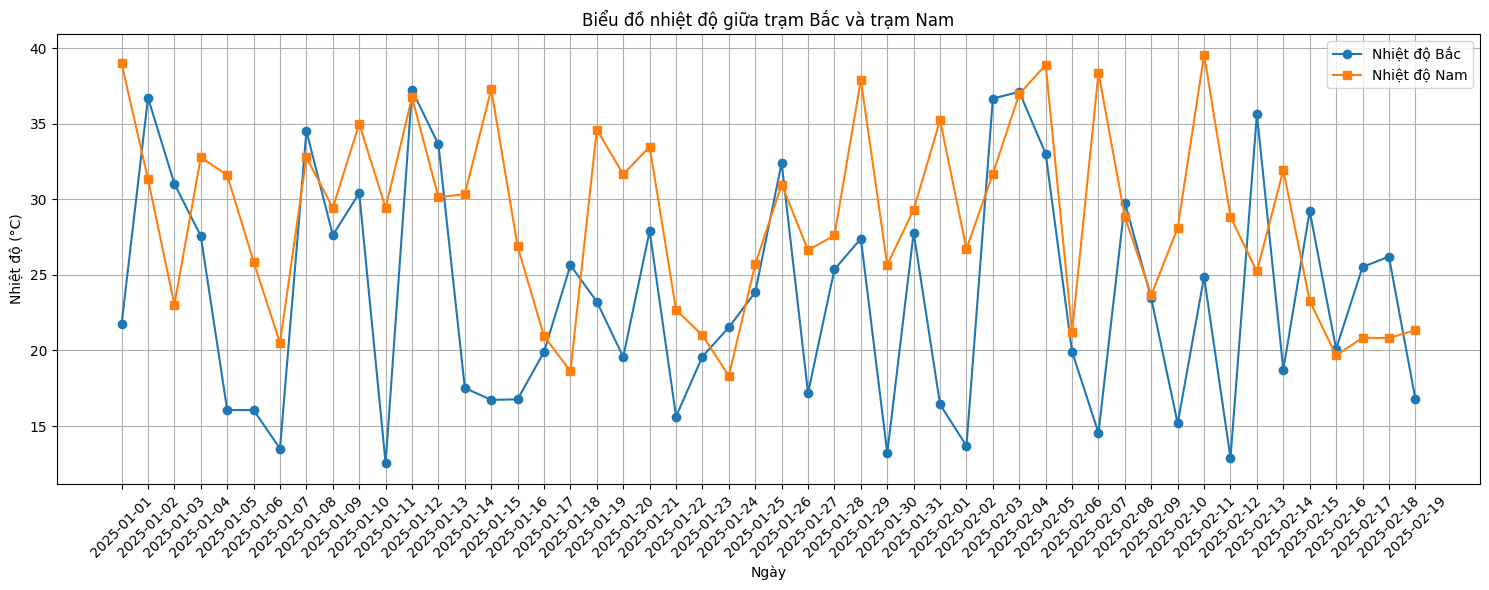

In [14]:
import matplotlib.pyplot as plt
import numpy as np
data = np.genfromtxt("ket_qua_case_6.csv", delimiter=",", dtype=str, skip_header=1)
date = data[:, 0]
temp_bac = data[:, 1].astype(float)
temp_nam = data[:, 5].astype(float)

N = 50
date = date[:N]
temp_bac = temp_bac[:N]
temp_nam = temp_nam[:N]

plt.figure(figsize=(15,6))
plt.plot(date, temp_bac, marker="o", label="Nhiệt độ Bắc")
plt.plot(date, temp_nam, marker="s", label="Nhiệt độ Nam")

plt.xlabel("Ngày")
plt.ylabel("Nhiệt độ (°C)")
plt.title("Biểu đồ nhiệt độ giữa trạm Bắc và trạm Nam")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.savefig('Biểu đồ nhiệt độ giữa trạm Bắc và trạm Nam.png', dpi=150)
plt.tight_layout()
plt.show()


